# Table of Contents 

# Step 1: Import Libraries

# Step 2: Create a Bar Chart, a Histogram, a Scatterplot, and a Line Chart
### - Bar Chart
### - Histogram
### - Scatterplot
### - Line Chart

# Step 3: 'order_hour_of_day' Histogram

# Step 4: Bar Chart from the “loyalty_flag”

# Step 5: Difference in Expenditure by 'order_hour_of_day'

# Step 6: Connection Between Age and Family Situation

# Step 7: Connection Between Age and Spending Power

------

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import Data

In [2]:
# the path for the file shortcut

path= r'C:\Users\princess\Documents\09-2023 Instacart Basket Analysis'

In [3]:
# importing new merged dataset of orders, products, and customers

ords_prods_cust= pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# check shape of new dataframe to make sure everything exported and imported okay

ords_prods_cust.head()

,user_id,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,...,reordered,product_name,department_id,prices,price_range,busiest_days,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,...,0,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer
1,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,...,1,Soda,7,9.0,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer
2,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,...,1,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer
3,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,...,0,0% Greek Strained Yogurt,16,12.6,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer
4,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,1,0% Greek Strained Yogurt,16,12.6,Mid-range product,Least busy days,8,New customer,Low spender,Regular customer


# Step 2: Create a Bar Chart, a Histogram, a Scatterplot, and a Line Chart

### Bar Chart

<Axes: xlabel='orders_day_of_week'>

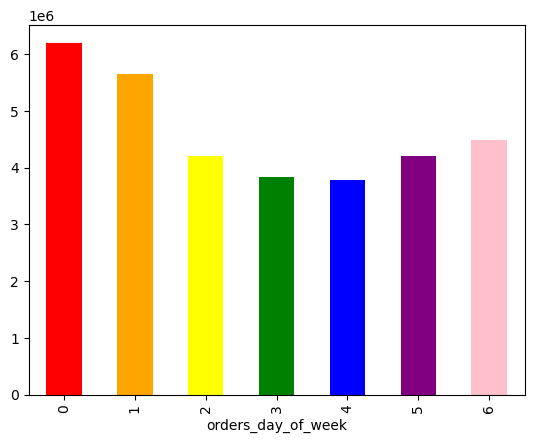

In [5]:
ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(color =[ 'red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

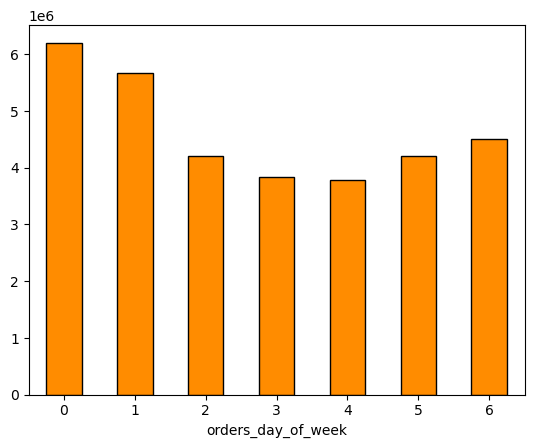

In [6]:
# Making the bar chart more accessible

bar=ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(facecolor='darkorange', edgecolor='k')
plt.xticks(rotation=0)

In [7]:
#Exporting bar chart

bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

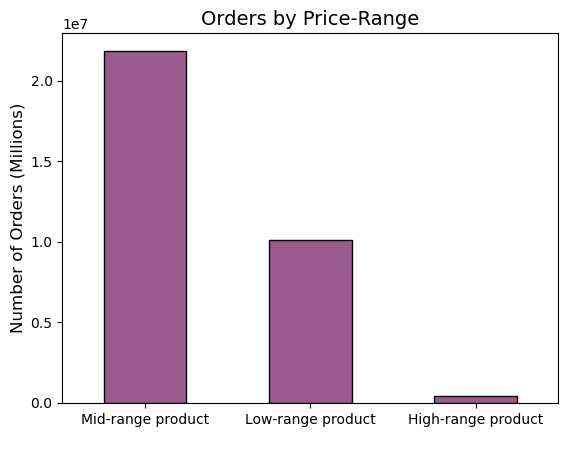

In [10]:
# Bar Graph for Price Groupings
bar_price_group = ords_prods_cust['price_range'].value_counts()
bar_price_group = bar_price_group.plot(kind='bar', color='#9a5c8c', edgecolor= 'k')
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders (Millions)", fontsize=12)  
plt.title("Orders by Price-Range", fontsize=14)
plt.show()

In [11]:
# Exporting bar chart 
bar_price_group.figure.savefig(
    os.path.join(path, 'Analysis', 'Visualizations', 'price_range_group.png'),
    bbox_inches='tight'  # Adjust the extent of the saved figure to include all content
)

### Histogram

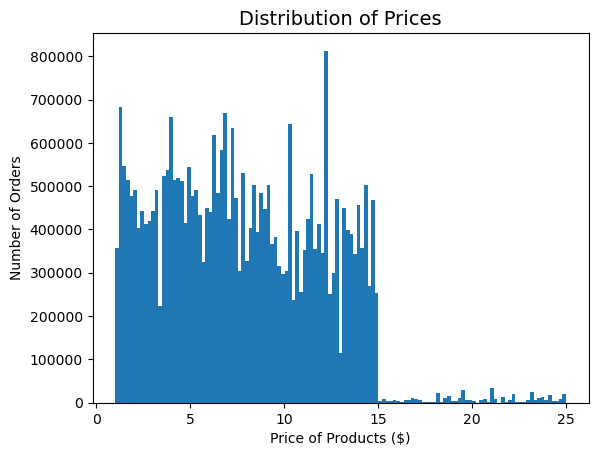

In [8]:
# Creating histogram

hist_price= ords_prods_cust['prices'].plot.hist(bins = 125)
plt.xlabel("Price of Products ($)", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders", fontsize=10)  
plt.title("Distribution of Prices", fontsize=14)
plt.show()

In [12]:
# Exporting histogram
hist_price.figure.savefig(
    os.path.join(path, 'Analysis', 'Visualizations', 'hist_orders_prices.png'),
    bbox_inches='tight'  # Adjust the extent of the saved figure to include all content
)

### Scatterplot

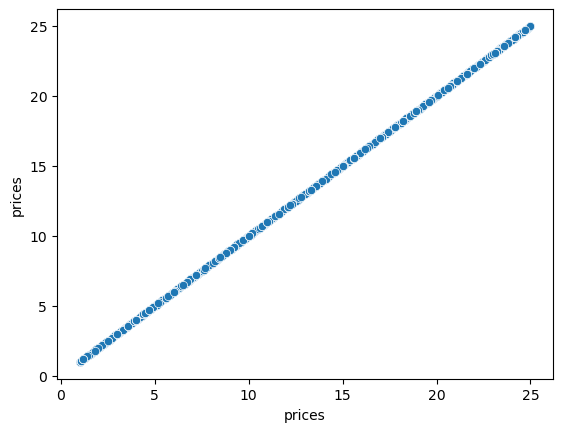

In [12]:
plot= sns.scatterplot(x='prices',y='prices',data=ords_prods_cust)

In [12]:
# Exporting scatterplot
plot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'plot_prices.png'))

### Line Chart

In [31]:
# Creating the 70/30 sample for the line chart since there is too much data

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [32]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [33]:
# the 70% sample created with the split

big = ords_prods_cust[dev]

In [34]:
# the 30% sample created with the split 

small = ords_prods_cust[~dev]

In [35]:
# len will produce values that represent length of whatever is in it
len (ords_prods_cust)

32404859

In [36]:
len(big) + len(small) #they both add up to the same so it is inputted correctly

32404859

In [37]:
# reducing sample to only the necessary columns for the chart
df_2 = small[['orders_day_of_week','prices']]

In [38]:
# since the new float16 dtype isn't working, i will change it to float32 
ords_prods_cust['prices']=ords_prods_cust['prices'].astype('float32')

In [39]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


In [40]:
df_2.dtypes

orders_day_of_week       int8
prices                float32
dtype: object

In [41]:
df_2.index

Index([       0,        2,        3,        6,       10,       12,       13,
             19,       21,       22,
       ...
       32404825, 32404827, 32404835, 32404836, 32404839, 32404841, 32404842,
       32404843, 32404849, 32404850],
      dtype='int64', length=9721098)

In [42]:
type(df_2.index)

pandas.core.indexes.base.Index

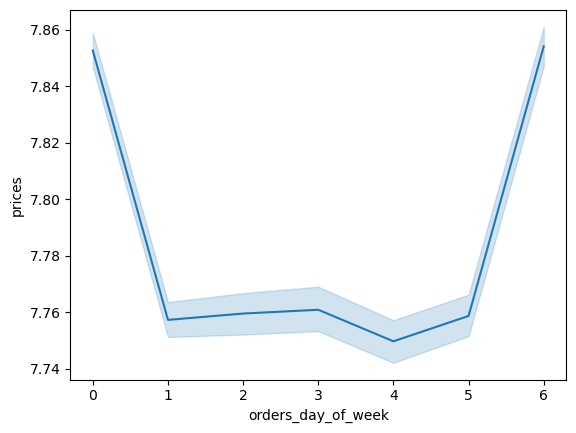

In [43]:
# line chart with the 30% sample??

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices') 

# Step 3: 'order_hour_of_day' Histogram

#### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
#### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

C:\Users\princess\AppData\Local\Temp\ipykernel_1484\1910354956.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('Busiest hour of the day', xy=(10,2761760), xytext=(5.3, 2700000),size=12, bbox=dict(boxstyle="round", color= 'oldlace', edgecolor='black'), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", color='darkorange'))


Text(0.5, 1.0, 'Orders by Hour of Day')

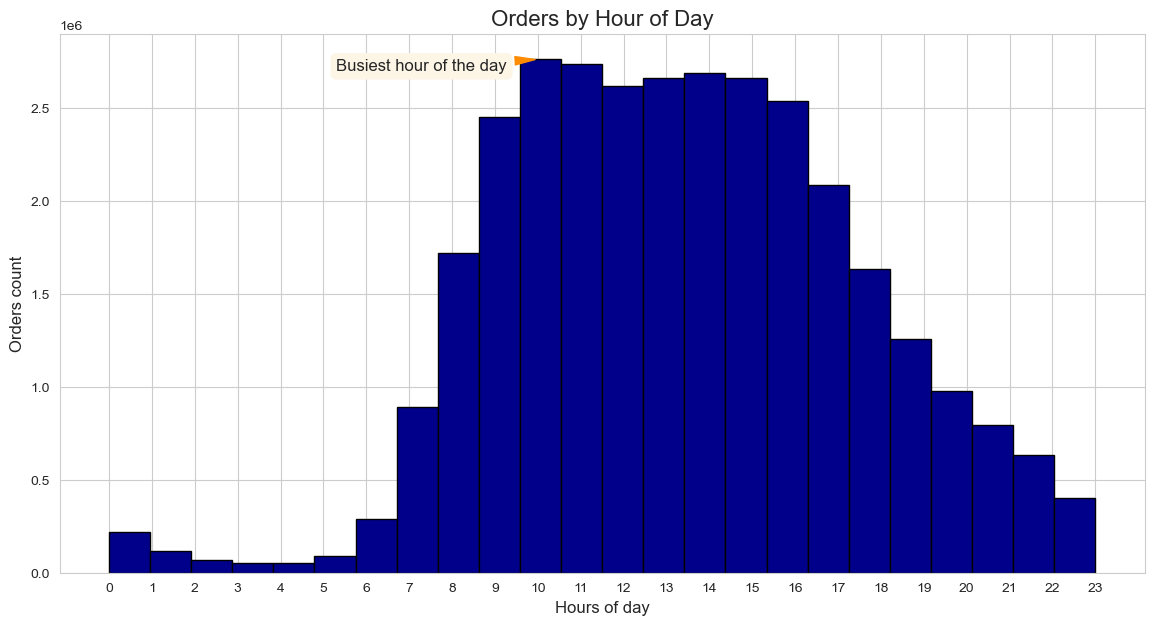

In [44]:
# creating a histogram for  order hour of day

order_hour_of_day_hist= plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
hist_orders_hour_of_day = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24, color= 'darkblue', edgecolor='k', align= 'mid')
plt.xticks(np.arange(24), fontsize=10)
plt.xlabel('Hours of day', fontsize=12)
plt.annotate('Busiest hour of the day', xy=(10,2761760), xytext=(5.3, 2700000),size=12, bbox=dict(boxstyle="round", color= 'oldlace', edgecolor='black'), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", color='darkorange'))
plt.ylabel('Orders count',fontsize=12)
plt.title('Orders by Hour of Day', fontsize=16)

#### The chart shows that the busiest hours of the day are around 10 and 11 am, staying busy until about 3 pm, before traffic begins to thin out. The peak hour is at 10 am.

In [45]:
#Exporting histogram

order_hour_of_day_hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_hour_of_day.png'))

# Step 4: Bar Chart from the “loyalty_flag”

#### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [46]:
# creating loyalty dataframe to make bins for each loyalty tier and to make final bar have a stepped color palette
loyalty= ords_prods_cust['loyalty_flag'].value_counts().rename_axis('loyalty_level').reset_index(name='count')

In [47]:
loyalty

,loyalty_level,count
0,Regular customer,15876776
1,Loyal customer,10284093
2,New customer,6243990


Text(0.5, 1.0, 'Order distribution by loyalty level')

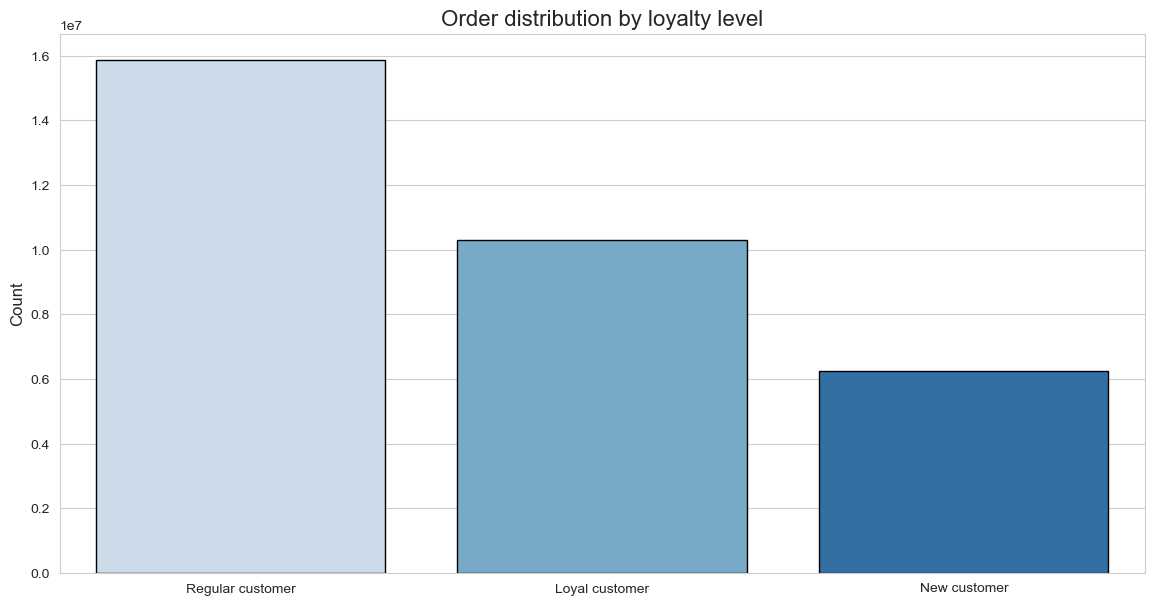

In [60]:
loyalty_bar_1= plt.figure(figsize=(14,7))
loyalty_bar=sns.barplot(data=loyalty, x='loyalty_level', y='count', palette='Blues', edgecolor='k')
plt.xlabel('')
plt.ylabel('Count',fontsize=12)
plt.title('Order distribution by loyalty level', fontsize=16)

In [62]:
#Exporting bar
loyalty_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_bar.png'))

In [61]:
loyalty_bar

<Axes: title={'center': 'Order distribution by loyalty level'}, ylabel='Count'>

# Step 5: Difference in Expenditure by 'order_hour_of_day'

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [50]:
# making a accurate subset for making a line chart for prices and order hour of day
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [51]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [52]:
# the 70% sample created with the split

big = ords_prods_cust[dev]

In [53]:
# the 30% sample created with the split 

small = ords_prods_cust[~dev]

In [54]:
# checking the count of the whole dataframe
len (ords_prods_cust)

32404859

In [55]:
len(big) + len(small) #they both add up to the same so it is inputted correctly

32404859

In [57]:
# reducing sample to only the necessary columns for the chart
df_3 = small[['order_hour_of_day', 'prices']]

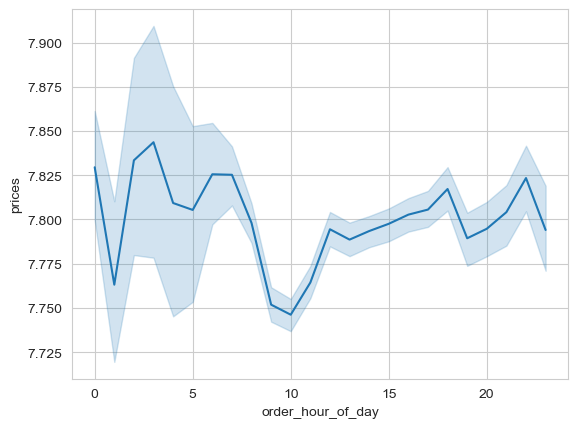

In [58]:
# making a line chart with the small df (30% sample?)
line_hour_price = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

It seems that there is no significant relationship between the hour of the day.

In [63]:
#Exporting line chart

line_hour_price.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_hour_price.png'))

# Step 6: Connection Between Age and Family Situation

#### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
#### In a markdown cell beneath your line chart, describe what the line chart shows.

In [67]:
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   order_number            int8   
 3   orders_day_of_week      int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float16
 6   product_id              int32  
 7   add_to_cart_order       int8   
 8   reordered               int8   
 9   product_name            object 
 10  department_id           int32  
 11  prices                  float32
 12  price_range             object 
 13  busiest_days            object 
 14  loyalty_flag            object 
 15  spending_flag           object 
 16  order_frequency_flag    object 
 17  surname                 object 
 18  gender                  object 
 19  state                   object 
 20  age                     int8   
 21  date_joined             objec

Text(0.5, 1.0, 'Number of Users by Marital Status')

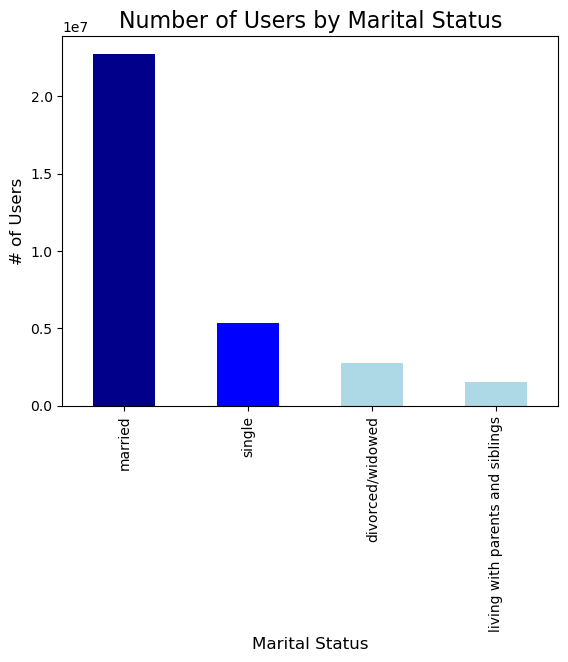

In [17]:
# first, I want to create a bar chart to see the marital status of the number of users

marital_status = ords_prods_cust['marital_status'].value_counts().plot.bar(color = ['darkblue', 'blue', 'lightblue', 'lightblue'])
plt.ylabel("# of Users", fontsize=12)
plt.xlabel('Marital Status', fontsize=12)
plt.title("Number of Users by Marital Status", fontsize=16)

#### From the bar chart, we can see that married users make up most of the customer base.

In [18]:
#export the bar chart 
marital_status.figure.figure.savefig(
    os.path.join(path, 'Analysis', 'Visualizations', 'bar_marital_status.png'),
    bbox_inches='tight'  # Adjust the extent of the saved figure to include all content
)

In [79]:
# to create the line chart, i will create a subset of 'number_of_dependants' and 'age' to highlight those
df_4 = small[['number_of_dependants', 'age']]

Text(0, 0.5, 'Number of Dependants')

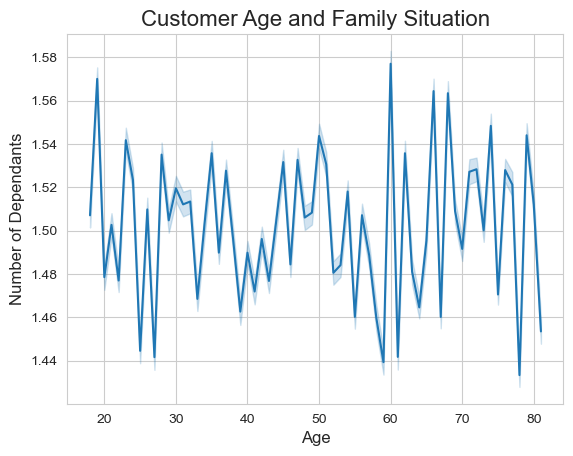

In [87]:
dependents_age_line = sns.lineplot(data = df_4, y = 'number_of_dependants', x = 'age')
plt.title('Customer Age and Family Situation', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Dependants', fontsize=12)

In [88]:
#export the line chart 

dependents_age_line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_dependants_age.png'))

#### It seems that there is no significant relationship between age and number of dependents. Though it is strange, considering that younger people around the age 18-20 even have dependents. The chart shows 19 year olrds having 1.57 dependents, which is odd.

# Step 7: Connection Between Age and Spending Power

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Text(0, 0.5, 'Income')

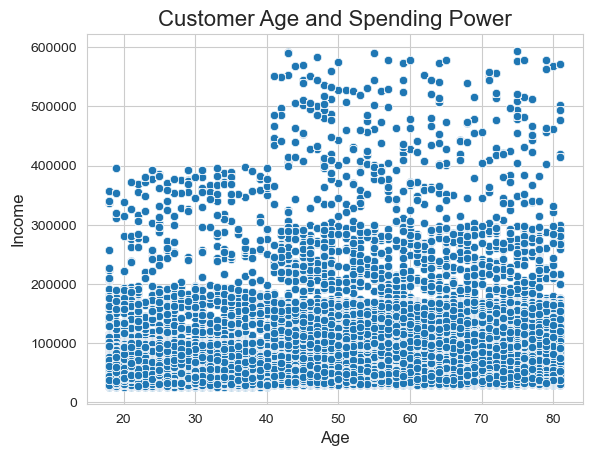

In [90]:
# create scatterplot
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust)
plt.title('Customer Age and Spending Power', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)

The income power remains steady until age 40, after that the income amount increases and remains high. The scatterplot shows that the majority of customers across all ages have an income under 200k, with the 41+ people earning 200k+.

In [98]:
age_income_scatterplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income_scatterplot.png'))

In [93]:
# I want to check the average income between both genders, seems females make slightly more in the customer base.
ords_prods_cust.groupby('gender')['income'].mean()

gender
Female    99743.229495
Male      99136.453908
Name: income, dtype: float64

In [100]:
# performing a couunt for how many of each gender there is
ords_prods_cust.groupby('gender').count()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,spending_flag,order_frequency_flag,surname,state,age,date_joined,number_of_dependants,marital_status,income
gender,,,,,,,,,,,,,,,,,,,,,
Female,16089830,16089830,16089830,16089830,16089830,15059527,16089830,16089830,16089830,16089830,...,16089830,16089830,16089830,16089830,16089830,16089830,16089830,16089830,16089830,16089830
Male,16315029,16315029,16315029,16315029,16315029,15269236,16315029,16315029,16315029,16315029,...,16315029,16315029,16315024,16315029,16315029,16315029,16315029,16315029,16315029,16315029


Seems there are more male customers, but females have more income power.  